## Load packages

In [1]:
import sys
sys.path.append(sys.path[0] + '/bin')

In [2]:
import PyMorpionSolitaire

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os.path

## Define game type

Define the game type:
- starting configuration ('c' for cross or 'p' for pipe)
- length of line (4 or 5)
- touching or disjoint

In [15]:
game_type = 'c'
line_length = 4
disjoint = False

In [16]:
prefix = '{}{}{}'.format('cross' if game_type == 'c' else 'pipe', line_length + 1, 'D' if disjoint else 'T')
prefix

'cross5T'

In [17]:
mc_file = 'data/' + prefix + '_mc.npy'
nested_file = 'data/' + prefix + '_nested.npy'
nested2_file = 'data/' + prefix + '_nested2.npy'

## Generate data

Create a new game:

In [8]:
game = PyMorpionSolitaire.Game(game_type, line_length, disjoint)

Play several games at random and plot the distribution of scores:

In [144]:
n = 1000000
mc_score_count = np.array([0 for _ in range(250)])
for _ in tqdm(range(n)):
    game.restart()
    game.playAtRandom()
    mc_score_count[game.getScore()] += 1
mc_score_count = np.trim_zeros(mc_score_count, 'b')
assert n == mc_score_count.sum()

100%|███████████████████████████████| 1000000/1000000 [03:47<00:00, 4390.93it/s]


In [145]:
np.save(mc_file, mc_score_count)

Use the nested Monte-Carlo algorithm at level 1:

In [146]:
n = 10000
nested_score_count = np.array([0 for _ in range(250)])
for _ in tqdm(range(n)):
    game.restart()
    game.playNestedMC(1)
    nested_score_count[game.getScore()] += 1
nested_score_count = np.trim_zeros(nested_score_count, 'b')
assert n == nested_score_count.sum()

100%|█████████████████████████████████████| 10000/10000 [17:57<00:00,  9.28it/s]


In [147]:
np.save(nested_file, nested_score_count)

Use the nested Monte-Carlo algorithm at level 2:

In [10]:
n = 100
nested2_score_count = np.array([0 for _ in range(250)])
for _ in tqdm(range(n)):
    game.restart()
    game.playNestedMC(2)
    nested2_score_count[game.getScore()] += 1
nested2_score_count = np.trim_zeros(nested2_score_count, 'b')
assert n == nested2_score_count.sum()

100%|█████████████████████████████████████████| 100/100 [19:20<00:00, 11.60s/it]


In [11]:
np.save(nested2_file, nested2_score_count)

## Figures

In [18]:
def plot_frequency(file, label):
    if os.path.isfile(file):
        score_count = np.append(np.load(file), 0)
        freq = score_count / score_count.sum()
        bins = [i + 0.5 for i in range(len(freq))]
        plt.step(bins, freq, label='{} ({:,.0f} games)'.format(label, score_count.sum()))

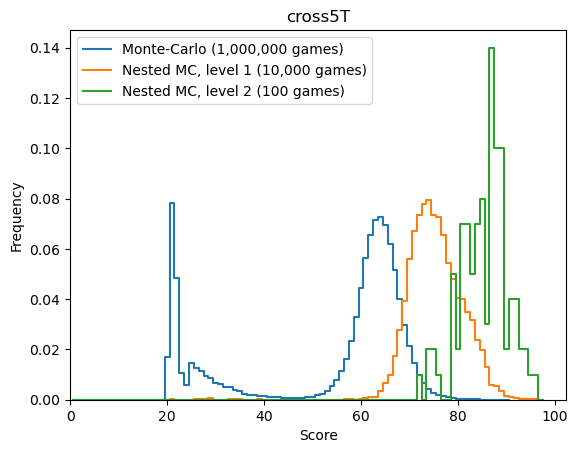

In [19]:
plot_frequency(mc_file, 'Monte-Carlo')
plot_frequency(nested_file, 'Nested MC, level 1')
plot_frequency(nested2_file, 'Nested MC, level 2')
plt.xlim(0)
plt.ylim(0)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title(prefix)
plt.legend()
plt.savefig('data/' + prefix + '.png')
plt.show()